In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

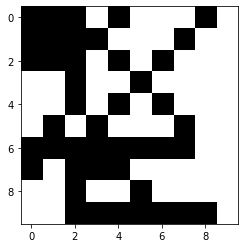

In [12]:
# binarize
img = cv2.cvtColor(cv2.imread("../renketsu.png"), cv2.COLOR_BGR2GRAY).astype(np.int8)
img[img < 0] = 1
img = 1 - img  # for 8-adjacent number
plt.imshow(img, cmap="gray")
plt.show()

In [13]:
def adjacent_number(img, y, x):
    H, W = img.shape
    h = [
        img[y, x], img[y, min(x+1, W-1)], img[max(0, y-1), min(x+1, W-1)],
        img[max(y-1, 0), x], img[max(y-1, 0), max(x-1, 0)], img[y, max(x-1, 0)],
        img[min(y+1, H-1), max(x-1, 0)], img[min(y+1, H-1), x], img[min(y+1, H-1), min(x+1, W-1)]
    ]
    return (h[1]-h[1]*h[2]*h[3]) + (h[3]-h[3]*h[4]*h[5]) + (h[5]-h[5]*h[6]*h[7]) + (h[7]-h[7]*h[8]*h[1])

In [16]:
H, W = img.shape
cmap = [
    [0, 0, 255],
    [0, 255, 0],
    [255, 0, 0],
    [255, 255, 0],
    [255, 0, 255]
]

output_img = np.zeros((H, W, 3), dtype=np.uint8)
for i in range(H):
    for j in range(W):
        if img[i, j] == 0:
            output_img[i, j] = cmap[ adjacent_number(img, i, j) ]

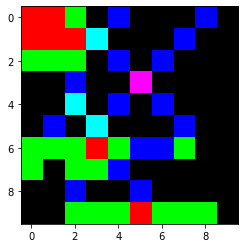

In [17]:
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()